### L2 Regularlization

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
N = 100
D = 2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# add a column of ones
# ones = np.array([[1]*N]).T
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [11]:
Y = sigmoid(z)

In [12]:
Y

array([0.14598012, 0.0062492 , 0.01087128, 0.02618165, 0.01899199,
       0.01993929, 0.10900187, 0.07579289, 0.00575568, 0.03812773,
       0.00825676, 0.00798196, 0.01705393, 0.03240285, 0.01732161,
       0.00622955, 0.00784903, 0.04342036, 0.01338918, 0.0742783 ,
       0.03581836, 0.01835945, 0.18229437, 0.01690209, 0.00423943,
       0.03045285, 0.02058825, 0.0246711 , 0.09652983, 0.0171268 ,
       0.01606615, 0.04751298, 0.03294094, 0.00366886, 0.05406148,
       0.00687999, 0.04873984, 0.01534415, 0.05168265, 0.0045824 ,
       0.03177164, 0.00324088, 0.02198096, 0.00815964, 0.02748338,
       0.01489662, 0.02158146, 0.04981539, 0.01373288, 0.02991455,
       0.47943876, 0.53866793, 0.6870942 , 0.88594296, 0.71403596,
       0.53547124, 0.39343186, 0.85454834, 0.61208808, 0.43509353,
       0.8248851 , 0.45901913, 0.76304499, 0.58130378, 0.91377855,
       0.4456226 , 0.85087591, 0.76977778, 0.74903617, 0.79536424,
       0.33881904, 0.67702835, 0.90327683, 0.83164192, 0.36094

In [15]:
def crossEntropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1-Y[i])
            
    #end for
    return E

In [16]:
learning_rate = 0.01
for i in range(100):
    if i % 10 == 0:
        print(crossEntropy(T, Y))

    # gradient descent weight udpate with regularization
    w += learning_rate * ( Xb.T.dot(T - Y) - 0.1*w)

    # recalculate Y
    Y = sigmoid(Xb.dot(w))


print("Final w:", w)

1.0369464249871498
1.0027747860079232
0.9734784128276909
0.9480242897015411
0.9256617641633142
0.9058311599503165
0.8881058227333607
0.872154145162474
0.8577139675006615
0.8445748861099719
Final w: [-0.63695937  2.06014897  2.60887892]


### L1 Regularlization

##### #'s features > #'s samples

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

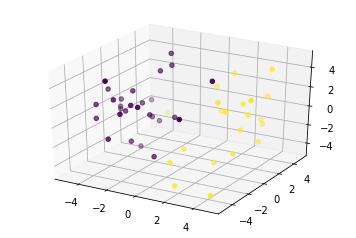

In [32]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

N = 50
D = 50

# uniformly distributed numbers between -5, +5
X = (np.random.random((N, D)) - 0.5)*10
# X = (np.random.randn(N, D) - 0.5)*10

# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))

# generate Y - add noise with variance 0.5
Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N)*0.5))




# let's plot the data to see what it looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
plt.show()

In [33]:
Y

array([0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.])

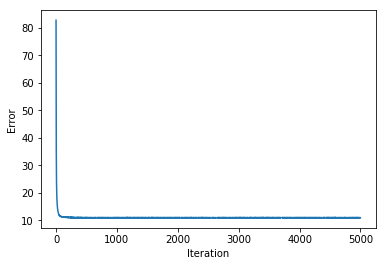

In [46]:

# perform gradient descent to find w
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
learning_rate = 0.001
l1 = 3.0 # try different values - what effect does it have on w?
for t in range(5000):
  # update w
    Yhat = sigmoid(X.dot(w))
    delta = Yhat - Y
    w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))

    # find and store the cost
    cost = -(Y*np.log(Yhat) + (1-Y)*np.log(1 - Yhat)).sum() + l1*np.abs(w).sum()
    costs.append(cost)

# plot the costs
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

In [49]:
np.round(Yhat)

array([0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.])

In [42]:
Y

array([0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.])

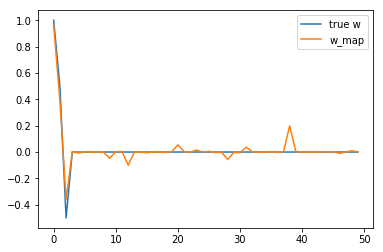

In [56]:
# plot our w vs true w
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()

In [57]:
true_w

array([ 1. ,  0.5, -0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ])